In [25]:
%matplotlib inline

In [1]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42


In [2]:
from scipy import stats

In [3]:
%run 'ks25_Read_epistasis.ipynb'

Running notebook 'ks01_Data_import.ipynb'...



/Users/karen/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/karen/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)



Variables: 

- positions:			a pandas.DataFrame with information about position numbers, segments etc
- get_segment_of_a_genotype:	a function that return the segment of genotype (the most likely segment
				because sometimes it's not possible to say for sure)


Reading precalculated epistasis...
/Users/karen/HIS3InterspeciesEpistasis/Analysis/Karen/files_dump/epistasis_in_foursomes/



Variables: 

- ep_dict: a dictionary, Keys are tuples (mutA, mutB) and values are pandas.Series of epistasis between mutA and mutB in all backgrounds. 
Tuples (mutA, mutB) are sorted by aa_position.

- get_ep_summary: a function that takes ep_dict as an argument and applies an arbitrary function to every pd.Series object. For example, ep_summary = get_ep_summary(ep_dict, np.mean)

- get_ep_summary_by_positions: a function that uses get_ep_summary and then averages results by position_pair. For example, get_ep_summary_by_positions(ep_dict, np.max, np.mean) will apply np.max to epistasis series and then us

In [4]:
%run 'ks21_Read_impacts_of_mutations.ipynb'


Variables: 

- positions:			a pandas.DataFrame with information about position numbers, segments etc
- get_segment_of_a_genotype:	a function that return the segment of genotype (the most likely segment
				because sometimes it's not possible to say for sure)


Variables: 

- fit_dict: a dictionary, keys are mutations and values are pandas.Series of fitness impacts in all backgrounds. 



In [5]:
%run 'ks20_Read_ddG.ipynb'


Variables: 

- positions:			a pandas.DataFrame with information about position numbers, segments etc
- get_segment_of_a_genotype:	a function that return the segment of genotype (the most likely segment
				because sometimes it's not possible to say for sure)


Variables: 
- predicted_ddG:		Pandas DataFrame with all calculated ddG (single, double and triple mutants (?)),
- predicted_doubles:		doubles only (Pandas DataFrame),
- predicted_singles:		singles only (Pandas DataFrame),
- get_ddG:			function that returns predicted ddG for a genotype
- by_position_mean_ddG:		mean ddG value at each position,
- by_position_var_ddG:		variance of predicted ddG at each position.



In [6]:
%run 'ks35_Read_weights.ipynb'


Variables: 

- weights: pandas.DataFrame containing weights of mutations from neural network data (column 'weight') and weights, or fitness potential, of single mutants (column 'mutant_weight')



In [7]:
%run 'ks23_Read_Lucas_sign_epistasis_data.ipynb'

94 positions under sign epistasis
59 positions under reciprocal sign epistasis
Pandas DataFrames available:
lucas_sign_epistasis, lucas_reciprocal_sign_epistasis

pBon threshold = 0.01
The following sets of positions are available:
all_sampled_positions, sign_epistasis_positions, reciprocal_sign_epistasis_positions


In [8]:
lucas_sign_epistasis['mutA'] = lucas_sign_epistasis.apply(lambda df: df['Perm'][0] + str(df['VarPos_absolute']) + df['Perm'][1], axis=1)
lucas_sign_epistasis['mutB'] = lucas_sign_epistasis.apply(lambda df: df['SubPerm'][0] + str(df['SubPos_absolute']) + df['SubPerm'][1], axis=1)
lucas_sign_epistasis['mut_list_Scer_full'] = lucas_sign_epistasis.apply(lambda df: ':'.join(sorted([df['mutA'], df['mutB']], key=lambda s: int(s[1:-1]))), axis=1)
lucas_sign_epistasis['mut_list_Scer'] = lucas_sign_epistasis.apply(lambda df: ':'.join(sorted([df['mutA'][1:], df['mutB'][1:]], key=lambda s: int(s[:-1]))), axis=1)
lucas_sign_epistasis.set_index('mut_list_Scer_full', inplace=True)

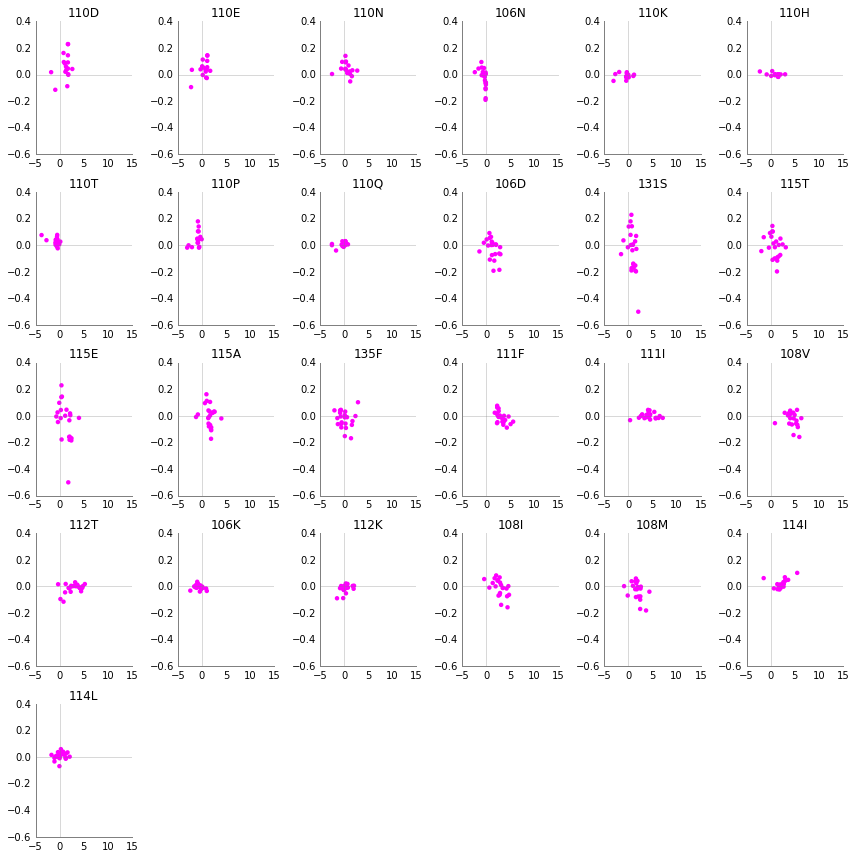

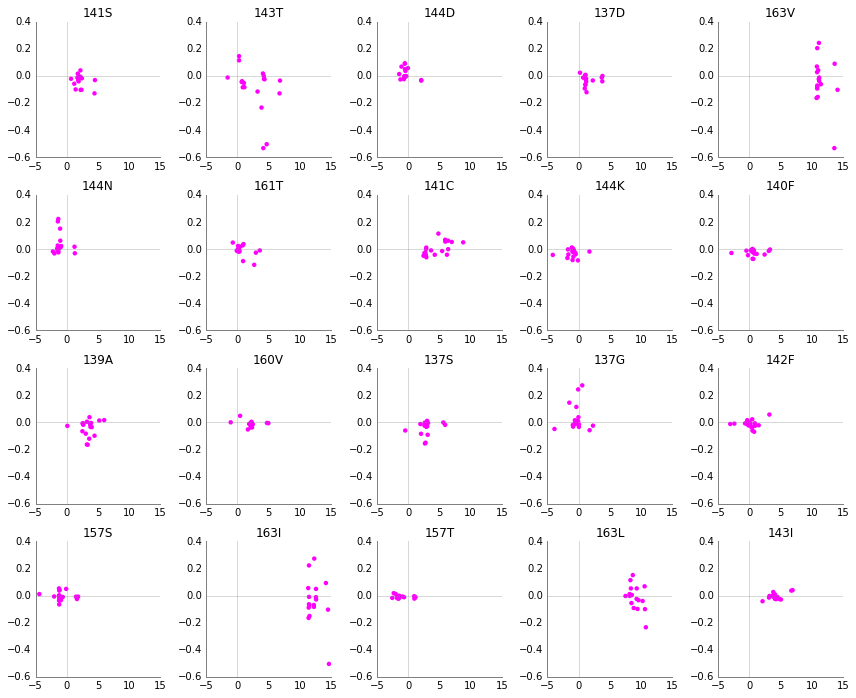

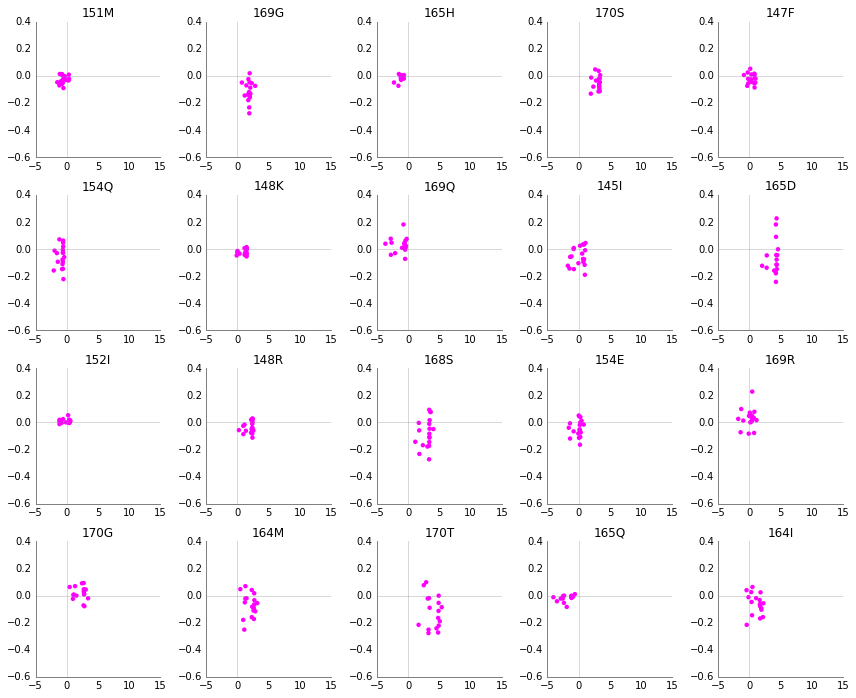

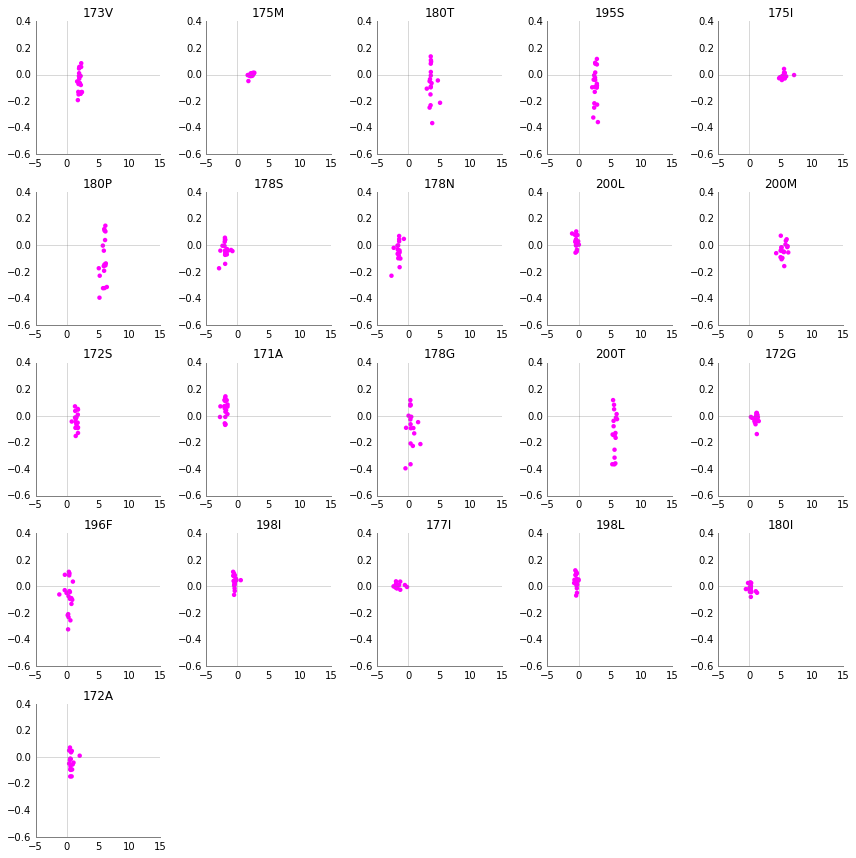

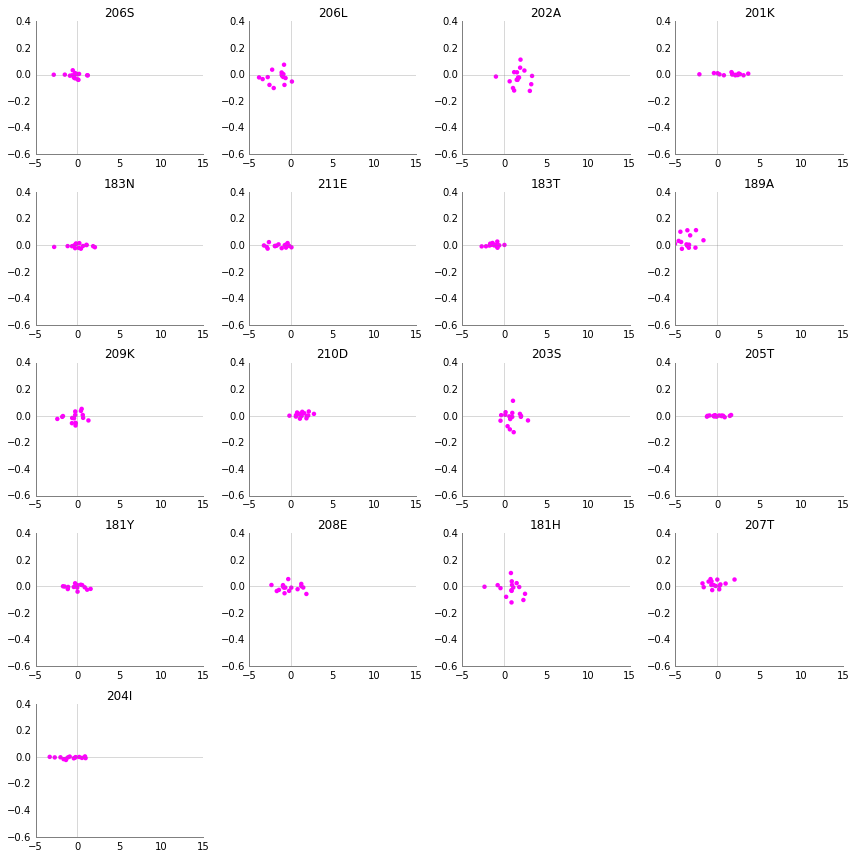

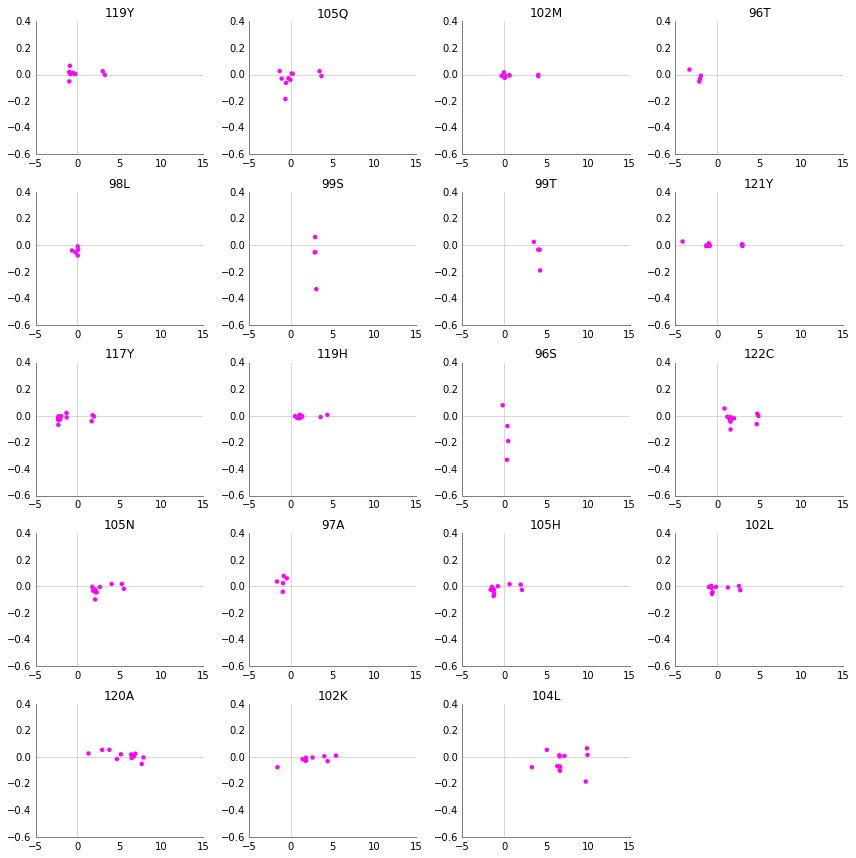

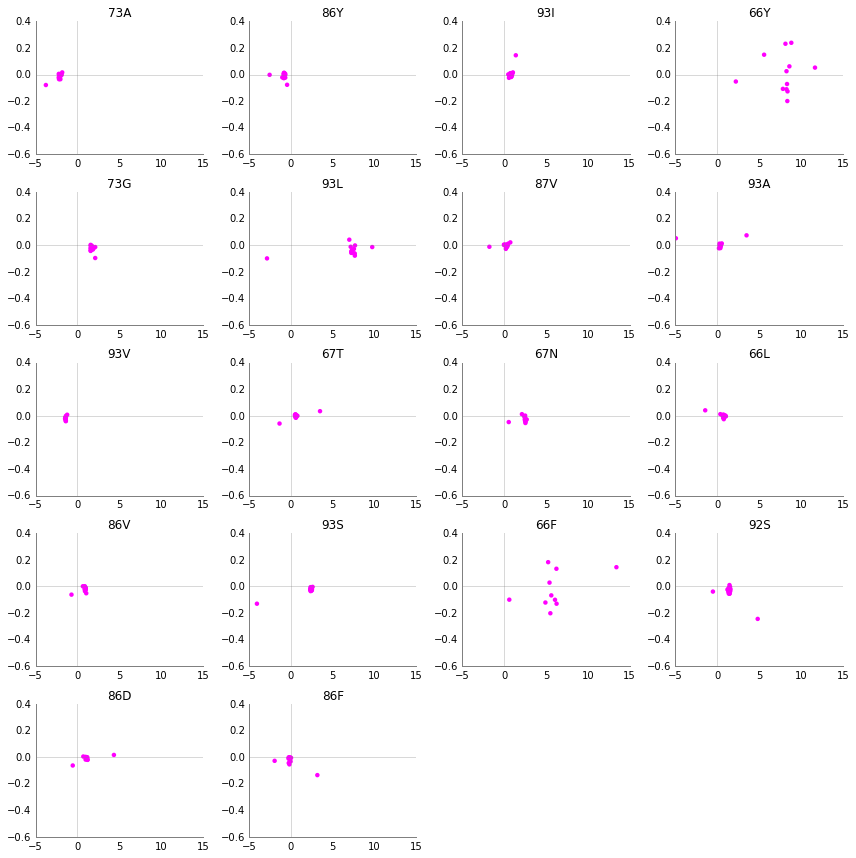

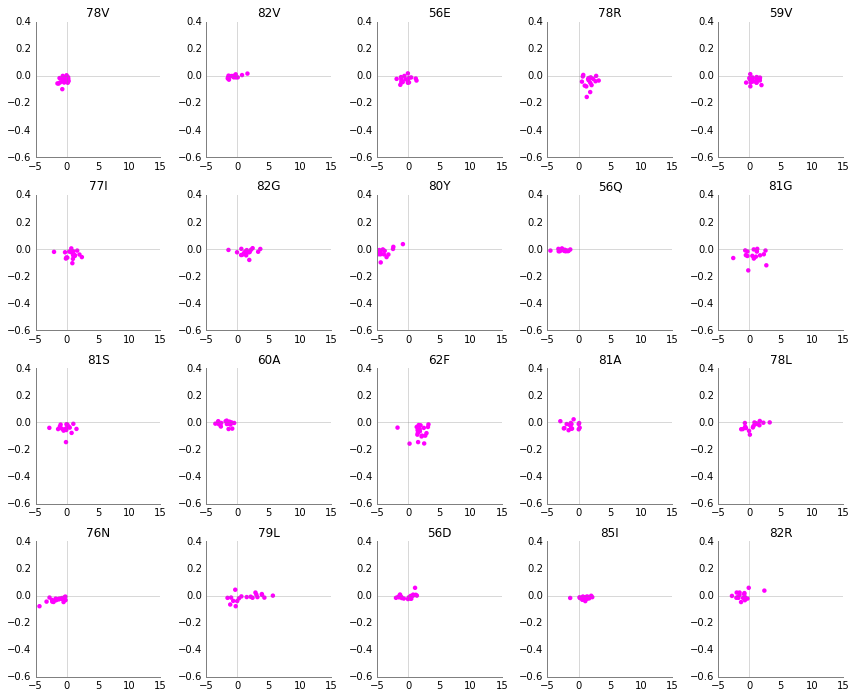

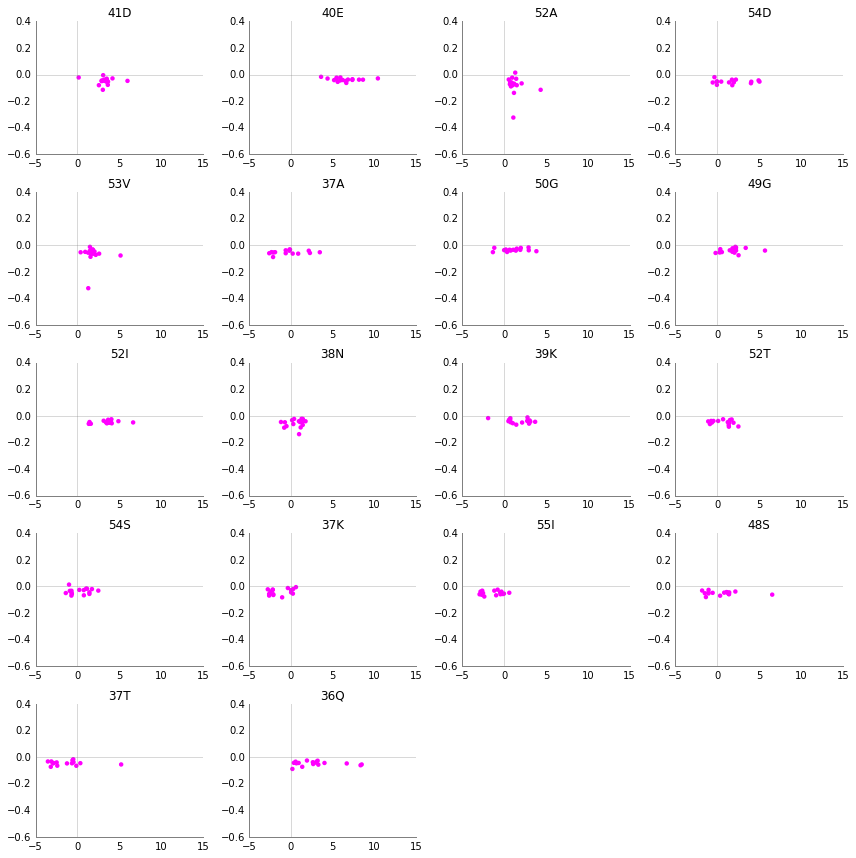

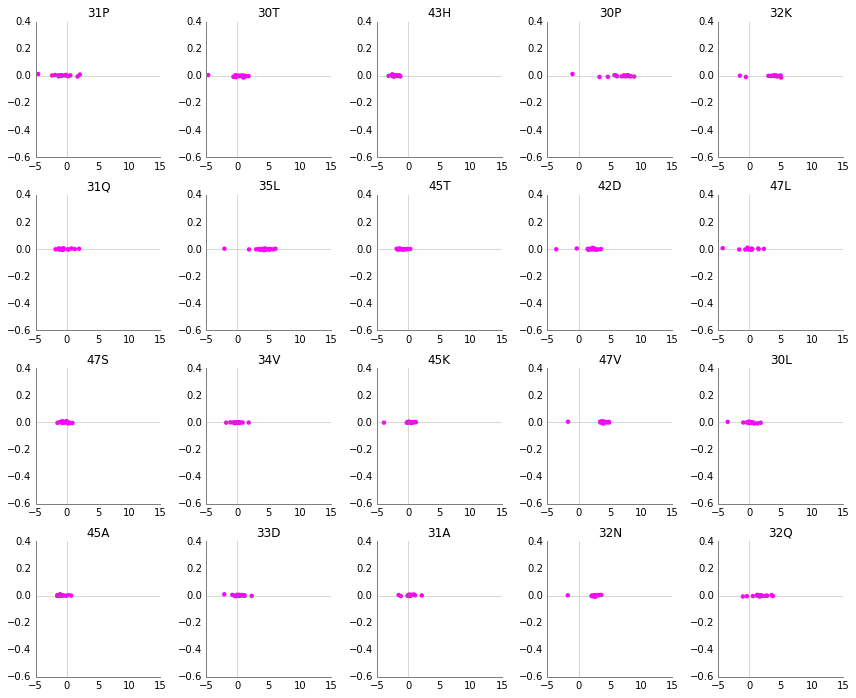

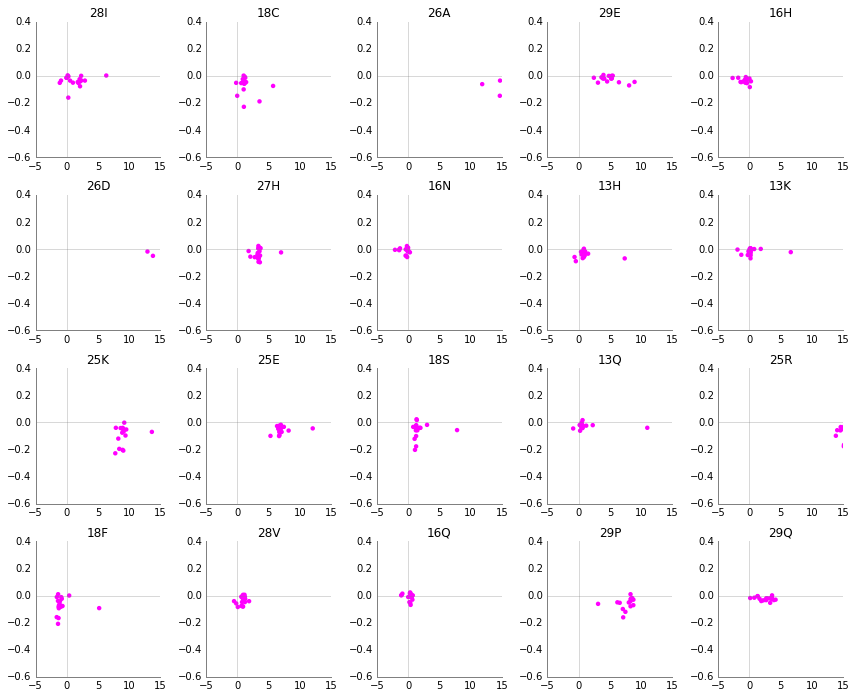

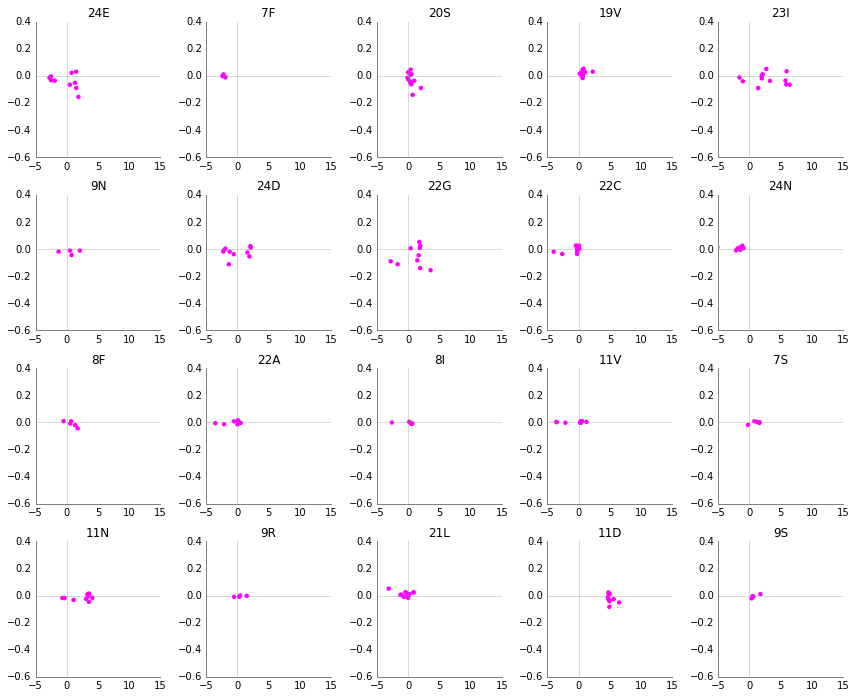

In [47]:
def get_genotype(mutations):
    return ':'.join(sorted(mutations, key=lambda m: int(m[:-1])))

def get_position(mutation):
    return int(mutation[:-1])

ddG_table = predicted_ddG
# segment = 'S8_scaled'

folding_effects = OrderedDict()
epistasis_effects = OrderedDict()
for segment in data_natural:
    plot_better(width=12, height=12)
    for index, mutA in enumerate(natural_unique_single_mutations[segment]):
            eps = []
            folding = []
            for mutB in natural_unique_single_mutations[segment]:
                if get_position(mutA) != get_position(mutB):
                    double_mutant = get_genotype([mutA, mutB]) 
                    ddG_double = ddG_table.loc[double_mutant].ddG
                    ddG_singleB = ddG_table.loc[mutB].ddG
                    ddG_singleA_in_bgrB = ddG_double - ddG_singleB
                    try:
                        epistasisA_in_bgrB = ep_dict[tuple(double_mutant.split(':'))].mean()
                        folding.append(ddG_singleA_in_bgrB)
                        eps.append(epistasisA_in_bgrB)
                    except:
                        pass
            folding_effects[mutA] = folding
            epistasis_effects[mutA] = eps
            ax = plt.subplot(5, len(natural_unique_single_mutations[segment])/5 + 1, index+1)
            improve_plot(ax, grid='')
            plt.scatter(folding, eps, edgecolor='none', alpha=1, color='magenta')
            plt.xlim(-5,15)
            plt.ylim(-0.6,0.4)
            plt.axvline(0, color='gray', alpha=0.3)
            plt.axhline(0, color='gray', alpha=0.3)
            plt.title(mutA)
    plt.tight_layout()
    plt.savefig('/Users/karen/Downloads/ddG_epistasis_%s.png' %segment, dpi=300)

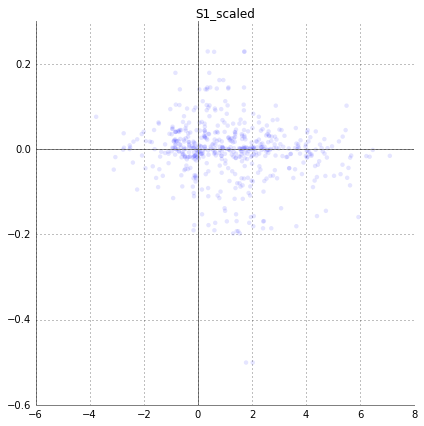

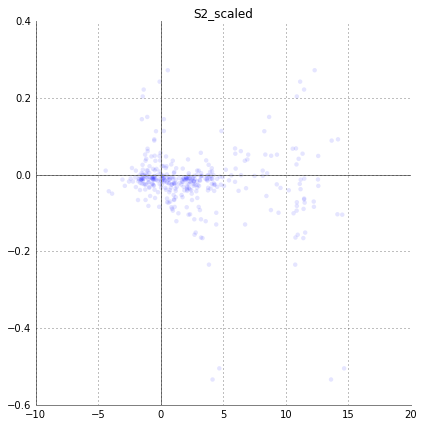

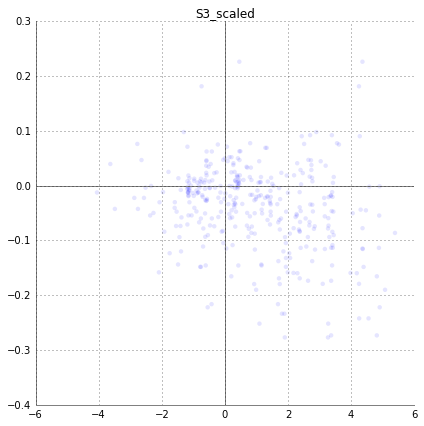

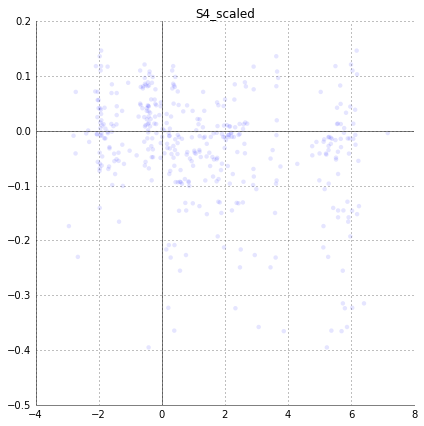

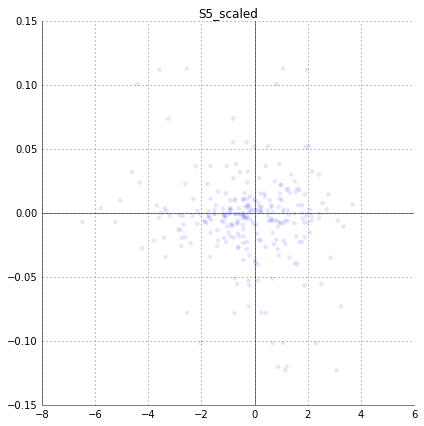

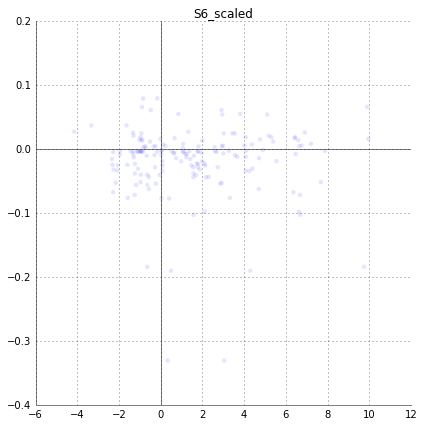

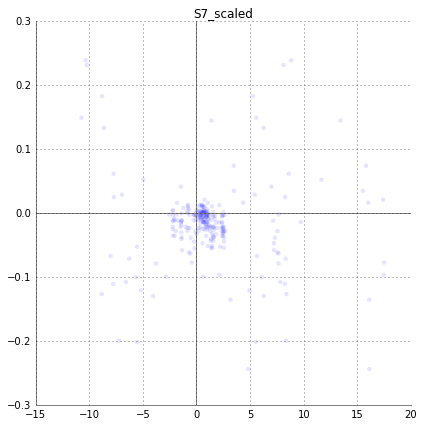

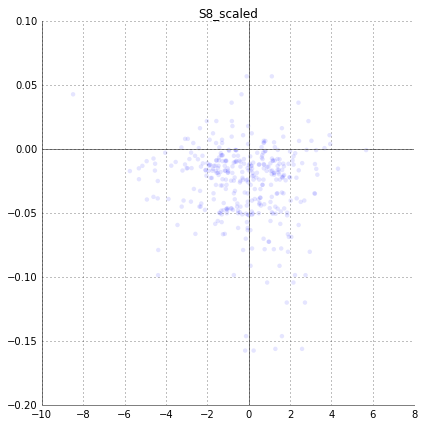

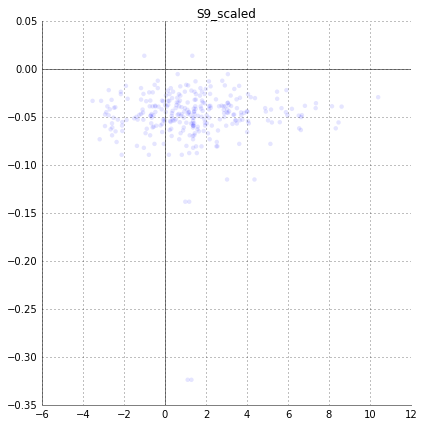

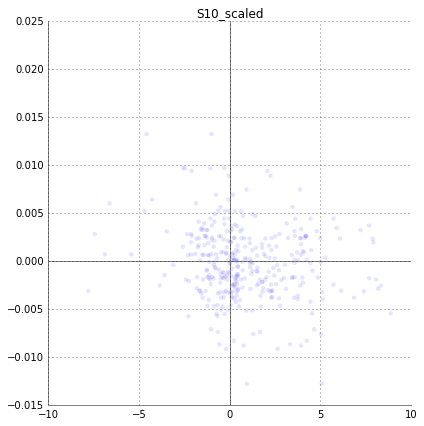

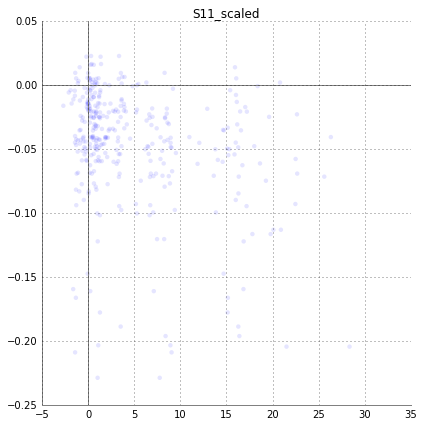

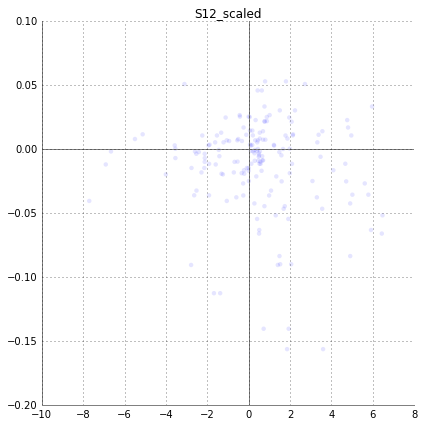

In [48]:
def get_genotype(mutations):
    return ':'.join(sorted(mutations, key=lambda m: int(m[:-1])))

def get_position(mutation):
    return int(mutation[:-1])

ddG_table = predicted_ddG
# segment = 'S8_scaled'

folding_effects = OrderedDict()
epistasis_effects = OrderedDict()
for segment in data_natural:
    plot_better(width=6, height=6)
    for index, mutA in enumerate(natural_unique_single_mutations[segment]):
            eps = []
            folding = []
            for mutB in natural_unique_single_mutations[segment]:
                if get_position(mutA) != get_position(mutB):
                    double_mutant = get_genotype([mutA, mutB]) 
                    ddG_double = ddG_table.loc[double_mutant].ddG
                    ddG_singleB = ddG_table.loc[mutB].ddG
                    ddG_singleA_in_bgrB = ddG_double - ddG_singleB
                    try:
                        epistasisA_in_bgrB = ep_dict[tuple(double_mutant.split(':'))].mean()
                        folding.append(ddG_singleA_in_bgrB)
                        eps.append(epistasisA_in_bgrB)
                    except:
                        pass
            folding_effects[mutA] = folding
            epistasis_effects[mutA] = eps
#             ax = plt.subplot(5, len(natural_unique_single_mutations[segment])/5 + 1, index+1)
#             improve_plot(ax, grid='')
            plt.scatter(folding, eps, edgecolor='none', alpha=0.1)
#             plt.xlim(-5,15)
#             plt.ylim(-0.6,0.4)
            plt.axvline(0, color='gray', alpha=0.3)
            plt.axhline(0, color='gray', alpha=0.3)
            plt.title(segment)
    plt.tight_layout()
    plt.savefig('/Users/karen/Downloads/ddG_epistasis_%s_altogether.png' %segment, dpi=300)